DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)


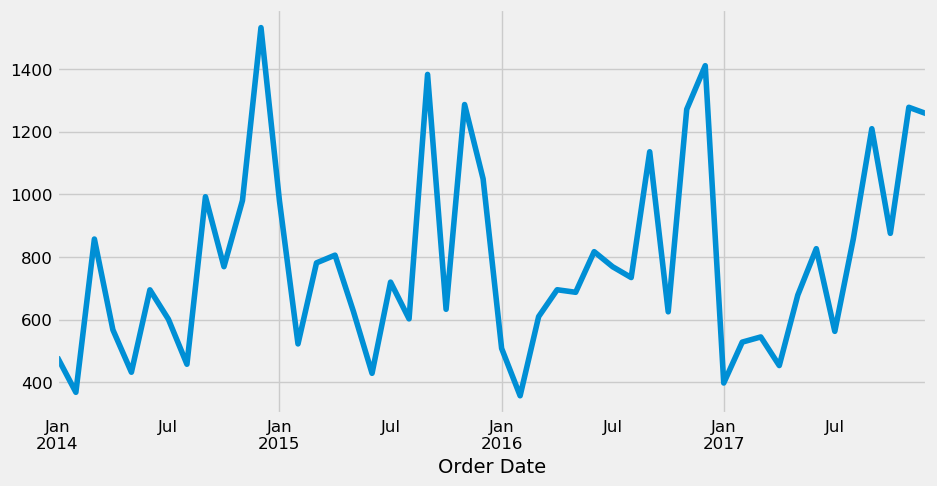

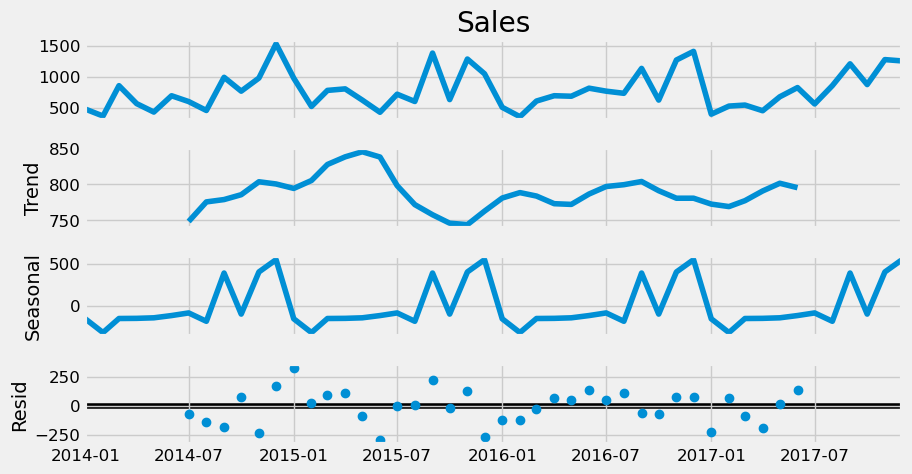

Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:279.58062333387767


In [18]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
df=pd.read_excel("Sample - Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture=furniture.sort_values('Order Date')
furniture=furniture.groupby('Order Date') ['Sales'].sum().reset_index()
furniture=furniture.set_index('Order Date')
# Displaying the index to ensure it's set correctly
print(furniture.index)
y = furniture['Sales'].resample('MS').mean()
y.plot (figsize=(10,5))
plt.show()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, model='additive')
fig = decomposition.plot()
fig.set_size_inches(10,5)
plt.show()
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
warnings.filterwarnings("ignore")
best_aic = float("inf")
best_param = None
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = (param, seasonal_param)
        except:
            continue
print('Best SARIMA{}x{}12 model - AIC:{}'.format(best_param[0], best_param[1], best_aic))

## exponential smoothing

In [23]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data = pd.Series([10, 12, 15, 13, 11, 14, 16])
# Apply single exponential smoothing
model = SimpleExpSmoothing(data)
fitted_model = model.fit()
forecast = fitted_model.predict(start=len(data), end=len(data)+2)
print("Smoothed data:", fitted_model.fittedvalues)
print("Forecast:", forecast)

Smoothed data: 0    10.0
1    10.0
2    12.0
3    15.0
4    13.0
5    11.0
6    14.0
dtype: float64
Forecast: 7    16.0
8    16.0
9    16.0
dtype: float64
